<a href="https://colab.research.google.com/github/NickLarsonUVA/DS2002/blob/main/DS2002_Data_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DS2002 Project - Comparing popular movies worlwide gross for recent movies and past movies -- trying to figure out if year has any relation to gross income

Data Ingestion

Data Ingestion: Your pipeline must be capable of fetching and processing raw data from two different sources:

Source 1: A remote dataset retrieved via URL download or an API call.

Source 2: A local file (CSV or JSON) mounted in your environment

First, download this CSV for the local file source

The link to my github for Source 2: https://github.com/NickLarsonUVA/DS2002/blob/main/DPmovies.csv

In [130]:
#Step 1: retrieving a local file
import pandas as pd
import requests

#Define the csv used for source 2
movie_csv = "DPmovies.csv"

#Read the CSV into a DataFrame
df = pd.read_csv(movie_csv)
df.head()  #Display first few rows

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross(Million),Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


Next, for the API I am using The Movie Database (TMDb) API to fetch and display popular movies

You will need to go to their website to sign up and get a key

1.Go to TMDb API and sign up.

2.Navigate to Settings → API and generate an API Key (v3 auth).

3.Copy the API key for use in Colab.

In [131]:
import requests

#Define the API endpoint with the correct API Key in the URL
api_key = ""  # Add your own API key - I will put mine in the comments of my submission
url = f"https://api.themoviedb.org/3/movie/popular?language=en-US&page=1&api_key={api_key}"

#Define the headers (no need for Authorization header now)
headers = {
    "accept": "application/json",
}

#Make the API request
response = requests.get(url, headers=headers)

#Check if the request was successful (Status Code 200)
if response.status_code == 200:
    data = response.json()  # This will convert response to JSON
    movies = data.get("results", [])  # Now it will extract the list of popular movies
else:
    print(f"Error {response.status_code}: {response.text}")  # Print error message if request fails

import pandas as pd

#Convert the movie data into a pandas DataFrame
df_movies = pd.DataFrame(movies, columns=["title", "release_date", "vote_average", "overview"])

#Display the first 10 movies
df_movies.head(10)


,title,release_date,vote_average,overview
0,Captain America: Brave New World,2025-02-12,6.131,After meeting with newly elected U.S. Presiden...
1,The Vigilante,2023-09-08,5.900,"Returning from Afghanistan, Jessica, a Spec OP..."
2,Cleaner,2025-02-19,5.800,When a group of radical activists take over an...
3,Cosmic Chaos,2023-08-03,3.300,"Battles in virtual reality, survival in a post..."
4,Z Zone,2025-02-07,7.600,"In a remote corner of the world, a group of tr..."
5,Batman Ninja vs. Yakuza League,2025-03-17,6.700,The Batman family has returned to the present ...
6,Snow White,2025-03-19,4.600,Princess Snow White flees the castle when the ...
7,The Codes of War,2025-03-20,0.000,"War stories about family, ethics and honor inc..."
8,The Electric State,2025-03-07,6.644,An orphaned teen hits the road with a mysterio...
9,Moana 2,2024-11-21,7.100,After receiving an unexpected call from her wa...


Data Transformation: Your pipeline must support the following operations:

Convert between file formats (e.g., JSON to CSV, CSV to JSON, JSON to SQL
database table, etc.). The user should be able to choose the desired output
format.   *** Desired output was hard to do and I used a lot of outside help from coding websites.

Modify the dataset structure by adding or removing columns. If adding
columns, you may insert any additional useful information.
I added a dictionary in order to add information for mine.

In [132]:
import requests
import pandas as pd
import sqlite3
import json

#Define the API endpoint with the correct API Key in the URL
api_key = ""  # Add your API key here
url = f"https://api.themoviedb.org/3/movie/popular?language=en-US&page=1&api_key={api_key}"

#Define the headers
headers = {
    "accept": "application/json",
}

#Make the API request
response = requests.get(url, headers=headers)


#Check if the request was successful (Status Code 200)
  #Went back in to error proof this code after completing it
if response.status_code == 200:
    data = response.json()  # This will convert response to JSON
    movies = data.get("results", [])  # Extract the list of popular movies
else:
    print(f"Error {response.status_code}: {response.text}")  # Print error message if request fails

#Step 1: Need to make a dictionary for movie titles to add worldwide gross based on dataset order
movie_titles = [
    "Captain America: Brave New World", "The Vigilante", "Cleaner", "Cosmic Chaos", "Z Zone",
    "Batman Ninja vs. Yakuza League", "Snow White", "The Codes of War", "The Electric State", "Moana 2",
    "Counterattack", "Old Guy", "Flight Risk", "Mufasa: The Lion King", "Hellhound", "Revelations",
    "The Gorge", "Demon City", "Sky Force", "Sonic the Hedgehog 3"
]

#Worldwide gross values in millions based on online research i completed
#important to note that for the 'None' was either because it was a Netflix movie with no box office release
#or the movie has been postponed from releasing fully
worldwide_gross = [
    400.8, 5.1, 1.2, 0.00867, 540.0, None, 87.3, None, 410.2, 1059.0,
    87.3, 171.6, 43.6, 717.9, 1.1, None, 29.1, None, 172.3, 489.5
]

#Create the dictionary with movie titles as keys and worldwide gross values as values
movie_gross_dict = {movie_titles[i]: worldwide_gross[i] for i in range(len(movie_titles))}

#Convert the movie data into a pandas DataFrame
df_movies = pd.DataFrame(movies, columns=["title", "release_date", "vote_average", "overview"])

#Function to add worldwide gross data to DataFrame
def add_worldwide_gross(df):
    df['worldwide_gross_million'] = df['title'].map(movie_gross_dict)
    return df

#apply the function to add the worldwide gross column
df_movies = add_worldwide_gross(df_movies)

#Drop unnecessary columns and keep only the selected ones
columns_to_keep = ['title', 'overview', 'release_date', 'vote_average', 'worldwide_gross_million']
df_movies = df_movies[columns_to_keep]

#Step 2: Converting between file formats - CSV
def json_to_csv(data, filename="movies.csv"):
    data.to_csv(filename, index=False)  #Save DataFrame as CSV
    print(f"Data saved as {filename}")
    print("\nCSV Output:")
    print(data)  #Print the content of the CSV

#Step 2 continued: Converting between file formats - SQL
def json_to_sql(data, db_name="movies.db"):
    conn = sqlite3.connect(db_name)
    c = conn.cursor()


    #Drop the old table if it exists (needed to do this because old data was interfering)
    c.execute('DROP TABLE IF EXISTS movies')

    #Create the movies table with the required columns (including the worldwide_gross_million column)
    c.execute('''
    CREATE TABLE IF NOT EXISTS movies (
        title TEXT,
        release_date TEXT,
        vote_average REAL,
        overview TEXT,
        worldwide_gross_million REAL
    )
    ''')

    #Insert the data into the table
    for movie in data:
        c.execute('''
        INSERT INTO movies (title, release_date, vote_average, overview, worldwide_gross_million)
        VALUES (?, ?, ?, ?, ?)
        ''', (movie['title'], movie['release_date'], movie['vote_average'], movie['overview'], movie['worldwide_gross_million']))

    conn.commit()
    conn.close()
    print(f"Data saved to {db_name}")

    #Fetch and print the data back from the database
    conn = sqlite3.connect(db_name)
    query = "SELECT * FROM movies"
    sql_data = pd.read_sql(query, conn)
    print("\nSQL Output:")
    print(sql_data)
    conn.close()


#Step 2 continued: Converting between file formats - JSON
def json_to_json(data, filename="movies.json"):
    with open(filename, "w") as f:
        json.dump(data, f)
    print(f"Data saved as {filename}")

    # Print the data from JSON
    print("\nJSON Output:")
    with open(filename, "r") as f:
        print(json.load(f))

#Ask user for output format choice
output_format = input("Enter the desired output format (csv, json, sql): ").lower()

#Check for format choice and convert to the selected format
if output_format == "csv":
    json_to_csv(df_movies, "movies_from_api.csv")
elif output_format == "sql":
    json_to_sql(df_movies.to_dict(orient="records"))
elif output_format == "json":
    json_to_json(df_movies.to_dict(orient="records"))
else:
    print("Unsupported format. Please choose 'csv', 'json', or 'sql'.")


Enter the desired output format (csv, json, sql): csv
Data saved as movies_from_api.csv

CSV Output:
                               title  \
0   Captain America: Brave New World   
1                      The Vigilante   
2                            Cleaner   
3                       Cosmic Chaos   
4                             Z Zone   
5     Batman Ninja vs. Yakuza League   
6                         Snow White   
7                   The Codes of War   
8                 The Electric State   
9                            Moana 2   
10                     Counterattack   
11                           Old Guy   
12                       Flight Risk   
13             Mufasa: The Lion King   
14                         Hellhound   
15                       Revelations   
16                         The Gorge   
17                        Demon City   
18                         Sky Force   
19              Sonic the Hedgehog 3   

                                             overview rele

Data Merging and Analysis

Merge the two data sources into a single dataset.
Perform a simple data analysis (e.g., identifying correlations, trends, or
aggregations).

Present the analysis results in a structured format (tables, charts, or summary
statistics)

In [153]:
# I learned that in doing this merging that I couldn't truly merge the data sets
# because none of the titles were the same in either data set.
# I used the pd.concat instead to combine the data allowing them to be on the
# same data frame together

import pandas as pd

# Load the local CSV data
local_df = pd.read_csv("DPmovies.csv")

# Renaming columns in the local dataset to match the API dataset
local_df.rename(columns={
    "Film": "title",
    "Worldwide Gross(Million)": "worldwide_gross_million",
    "Year": "release_year"
}, inplace=True)

# Load the API dataset
movies_from_api = pd.read_csv("movies_from_api.csv")

# Renaming columns in the API dataset
movies_from_api.rename(columns={
    "release_date": "release_year",  # change to release_year
# Other titles already match
}, inplace=True)

# Extract the year from the 'release_date' column in the API data
movies_from_api['release_year'] = pd.to_datetime(movies_from_api['release_year'], errors='coerce').dt.year

# Ensure the 'release_year' in both datasets is in numeric format
local_df['release_year'] = pd.to_numeric(local_df['release_year'], errors='coerce')
movies_from_api['release_year'] = pd.to_numeric(movies_from_api['release_year'], errors='coerce')

# Select only the columns you're interested in for both datasets
local_df_filtered = local_df[['title', 'release_year', 'worldwide_gross_million']]
movies_from_api_filtered = movies_from_api[['title', 'release_year', 'worldwide_gross_million']]

# Concatenate the two datasets
combined_df = pd.concat([local_df_filtered, movies_from_api_filtered], ignore_index=True)

# Finally Display the combined dataset
# Print the first 5 rows
print(combined_df.head())
# Print the last 5 rows
print(combined_df.tail())
# the shows that it has both data points from each data set combined

                                title  release_year worldwide_gross_million
0          Zack and Miri Make a Porno          2008                 $41.94 
1                     Youth in Revolt          2010                 $19.62 
2  You Will Meet a Tall Dark Stranger          2010                 $26.66 
3                        When in Rome          2010                 $43.04 
4               What Happens in Vegas          2008                $219.37 
                   title  release_year worldwide_gross_million
93           Revelations          2025                     NaN
94             The Gorge          2025                    29.1
95            Demon City          2025                     NaN
96             Sky Force          2025                   172.3
97  Sonic the Hedgehog 3          2024                   489.5


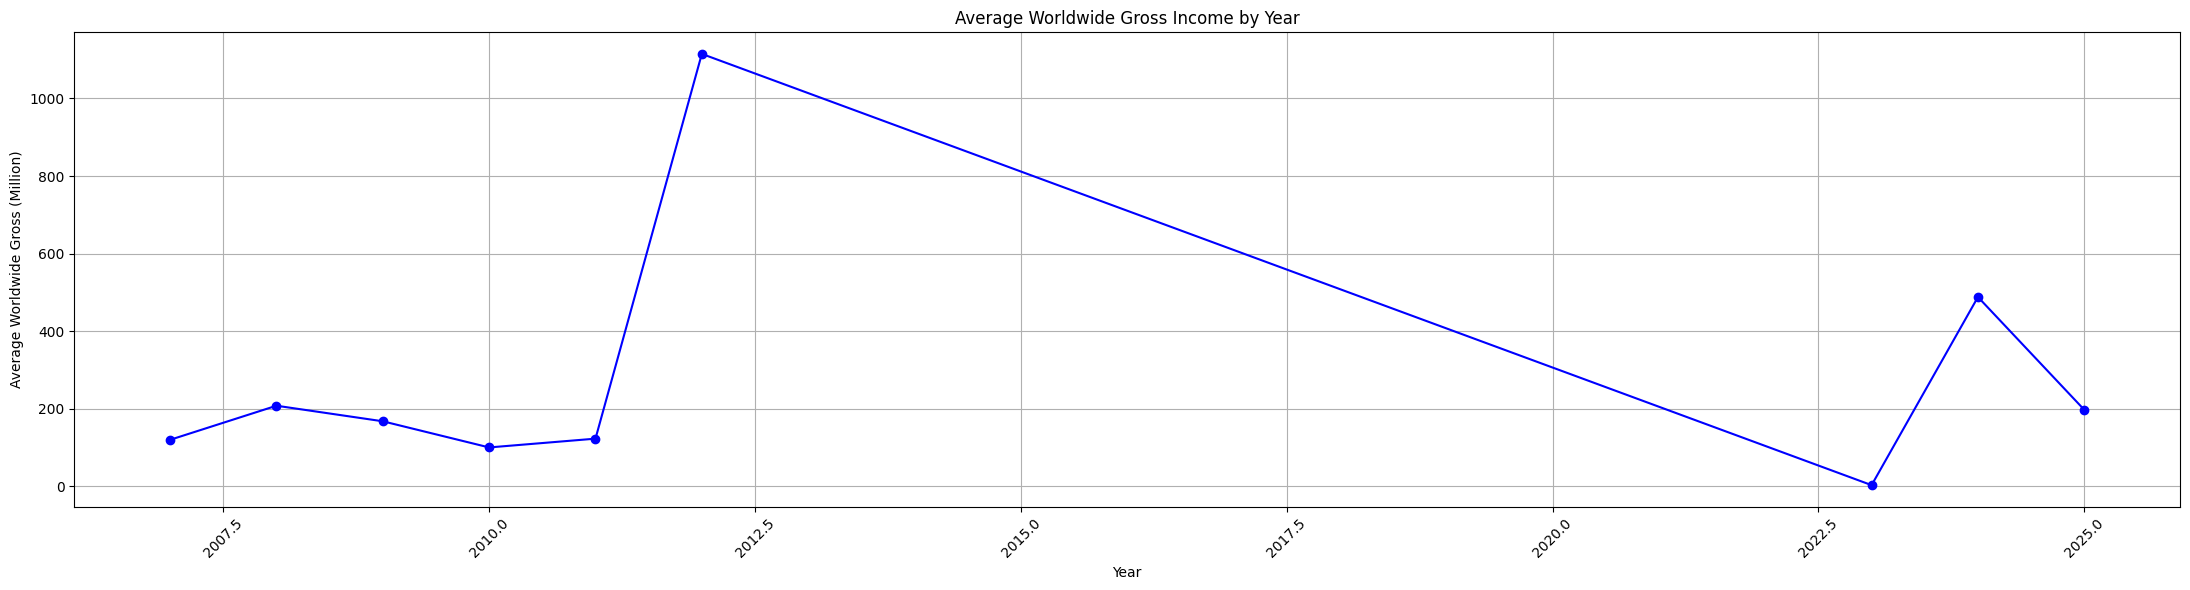

Summary Statistics for Worldwide Gross (Million):
count      94.000000
mean      175.667433
std       222.049168
min         0.008670
25%        32.447500
50%        89.950000
75%       218.642500
max      1114.980000
Name: worldwide_gross_million, dtype: float64

Correlation between Release Year and Worldwide Gross Income:
                         release_year  worldwide_gross_million
release_year                 1.000000                 0.179818
worldwide_gross_million      0.179818                 1.000000

Average Worldwide Gross Income by Year:
   release_year  worldwide_gross_million
0          2007               119.523636
1          2008               207.431000
2          2009               167.282500
3          2010                99.814000
4          2011               122.478571
5          2012              1114.980000
6          2023                 2.554335
7          2024               487.820000
8          2025               196.866667

Top 10 Movies with the Highest Wo

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Remove dollar signs, commas, and any trailing spaces from the 'worldwide_gross_million' column
combined_df['worldwide_gross_million'] = combined_df['worldwide_gross_million'].replace({'\$': '', ',': '', ' ': ''}, regex=True)

# Convert the column to numeric values
combined_df['worldwide_gross_million'] = pd.to_numeric(combined_df['worldwide_gross_million'], errors='coerce')

# Analysis part
summary_stats = combined_df['worldwide_gross_million'].describe()
correlation = combined_df[['release_year', 'worldwide_gross_million']].corr()
average_gross_by_year = combined_df.groupby('release_year')['worldwide_gross_million'].mean().reset_index()

# Visualize the trend of worldwide gross income over the years
plt.figure(figsize=(22, 6))
plt.plot(average_gross_by_year['release_year'], average_gross_by_year['worldwide_gross_million'], marker='o', linestyle='-', color='b')
plt.xlabel('Year')
plt.ylabel('Average Worldwide Gross (Million)')
plt.title('Average Worldwide Gross Income by Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

top_10_movies = combined_df[['title', 'release_year', 'worldwide_gross_million']].sort_values(by='worldwide_gross_million', ascending=False).head(10)

# Print results
print("Summary Statistics for Worldwide Gross (Million):")
print(summary_stats)

print("\nCorrelation between Release Year and Worldwide Gross Income:")
print(correlation)

print("\nAverage Worldwide Gross Income by Year:")
print(average_gross_by_year)

print("\nTop 10 Movies with the Highest Worldwide Gross Income:")
print(top_10_movies)


In [ ]:
# This data is clearly a little skewed as not all years have the same amount
# of data in them. Obviously 2012 should not have an average of 1.1 billion across
# the entire year

Data Storage:

Save the transformed data as a SQL database. Create required tables,
inserts...etc. You can use sqlite or mysql.

In [170]:
import sqlite3
import pandas as pd

# Create a connection to the SQLite database
conn = sqlite3.connect("movies_data.db")
cursor = conn.cursor()

# Create the table
cursor.execute('''
    CREATE TABLE IF NOT EXISTS movies (
        title TEXT,
        release_year INTEGER,
        worldwide_gross_million REAL
    )
''')

# Insert data from the DataFrame into the table
# Using the 'to_sql' method to insert data into the SQLite database
  #found this to_sql method on pandas website and stack overflow
combined_df.to_sql('movies', conn, if_exists='replace', index=False)
combined_df.to_sql('movies', conn, if_exists='replace', index=False)

# Commit the transaction and close the connection
conn.commit()

# Verify that the data has been inserted
cursor.execute("SELECT * FROM movies LIMIT 7;")  # Display the first 7 rows
print(cursor.fetchall())

# Close the connection
conn.close()


[('Zack and Miri Make a Porno', 2008, 41.94), ('Youth in Revolt', 2010, 19.62), ('You Will Meet a Tall Dark Stranger', 2010, 26.66), ('When in Rome', 2010, 43.04), ('What Happens in Vegas', 2008, 219.37), ('Water For Elephants', 2011, 117.09), ('WALL-E', 2008, 521.28)]


Data Summarization:

Your code should generate a brief summary of the ingested data, including:

▪ Number of records
▪ Number of columns

After processing, your code should generate a summary of the transformed
data, including:

▪ Number of records
▪ Number of columns

In [171]:
import pandas as pd

# Load the local CSV data
local_df = pd.read_csv("DPmovies.csv")

# Summary of the ingested local data
print("Summary of Local Data Before Processing:")
print(f"Number of records: {local_df.shape[0]}")
print(f"Number of columns: {local_df.shape[1]}")

# Load the API dataset
movies_from_api = pd.read_csv("movies_from_api.csv")

# Summary of the ingested API data
print("Summary of API Data Before Processing:")
print(f"Number of records: {movies_from_api.shape[0]}")
print(f"Number of columns: {movies_from_api.shape[1]}")
print("------------------------")

# Summary of the merged data after processing
print("Summary of Merged Data After Processing:")
print(f"Number of records: {combined_df.shape[0]}")
print(f"Number of columns: {combined_df.shape[1]}")

Summary of Local Data Before Processing:
Number of records: 78
Number of columns: 8
Summary of API Data Before Processing:
Number of records: 20
Number of columns: 5
------------------------
Summary of Merged Data After Processing:
Number of records: 98
Number of columns: 3


Last Part - Reflection Report: Submit a one-page reflection describing:

o Challenges encountered during implementation.
o Aspects that were easier than expected.
o Aspects that were more difficult than expected.
o How a utility like this could be useful for future data projects

Copied from my document of ~1.5 page length (double spaced - 12 times new roman)

This project was challenging and I jumped through a lot of hoops to make sure that it worked correctly. With the seemingly unlimited creative freedom that we had, it was tricky to put all of the pieces together in my project, but I think it was a really good learning experience for overcoming struggles and finding new ways to fix problems. For my project,  I decided to focus on popular movies and try to compare gross incomes that the film made while in box office.  

The easiest thing about the project for me was finding my two sources for data. There are numerous csv files on publicly available datasets and on github that I found that I looked over before deciding on one. There was also a really useful API website that is called “themoviedb” that provided loads of information I could use for my project ideas. It also had a lot of useful code embedded into showing how to call the API that they provided for free. Putting these two sources was also relatively simple because of the things we learned in class. The local source was a csv file and the API was JSON text so I could easily create data frames with both of them.

The hardest part of the project for me was the data transformation. I found it really tricky to convert between all of the file formats. I used a lot of outside help to write my code on these parts like stackoverflow as I couldn’t figure it all out on my own. I think that it was hard because I let the user input what way the information should be shown. This Desired output format led to a long line of code in my block that probably could’ve been done a lot easier but I don’t have full experience in doing something like this. Another challenge that I ran into was in the merging of the data sets. None of my data sets columns had the same names so I had to change close to all of them in order to merge them together. I also had to add some added information in order to merge them correctly in order to show what my project was trying to achieve. This was done through the dictionary I added to the API source. I had to do a lot of outside information finding on the imdb website to come up with all of the worldwide gross income values for this source. Lastly, I found that none of the movie titles on either source were the same so I had to add the two together using pd.concat, which was slightly new to me. I also had to retouch my matplotlib visualization code but I was able to get the hang of it again.

  A utility like an ETL processor is really useful to learn for future data projects in my opinion. It streamlines the process of gathering, cleaning, and transforming data, which can save a lot of time and effort for big projects. Mastering ETL processes also allows for better data integration, ensuring that data from various sources can be combined and analyzed effectively. I think that it will be the most beneficial for working with large datasets because it helps automate the process and make it more efficient.
